## k-Means for Image Compression

The goal of this exercise is to use k-means clustering for image compression in Python.

##### a) Load an image of the famous painting "American Gothic" by Grand Wood, and store it as an RGB-image. 

In [2]:
# For easy image loading, we use skimage.io via io.imread(url)
#  You can get it via installing the scikit-image module/package
#  e.g. by executing this command from a cell -->   %pip install scikit-image

import numpy as np
from skimage import io
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
# load the image
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Grant_Wood_-_American_Gothic_-_Google_Art_Project.jpg/895px-Grant_Wood_-_American_Gothic_-_Google_Art_Project.jpg"

# TODO: load image
img = io.imread(url)

# TODO: save it locally
io.imsave("original_image.jpg", img)

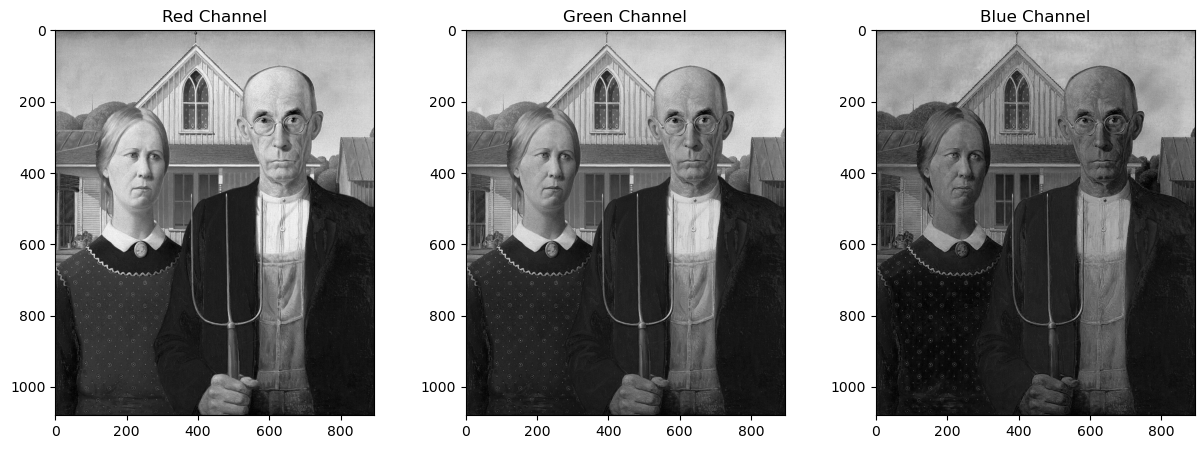

In [4]:
# TODO (optional): inspect the object you obtained from skimage.io.imread. Try to visualize
#  the color channels of the RGB image.
plt.figure(figsize=(15, 5))
for i, color in enumerate(['Red', 'Green', 'Blue']):
    plt.subplot(1, 3, i+1)
    plt.title(color + " Channel")
    plt.imshow(img[..., i], cmap='gray')
plt.show()

##### b) How many unique colors does the painting contain?

In [5]:
# TODO: Compute number of unique colors
unique_colors = np.unique(img.reshape(-1, img.shape[2]), axis=0).shape[0]
print("Unique colors:", unique_colors)

Unique colors: 117511


##### c) Apply k-means clustering to compress the image. 

In [6]:
# TODO:
# Write a custom function to reuse for subsequent tasks. Ideally, let it return
#  the KMeans objects if needed (for subtask e) ).

def compress_image(image, number_of_clusters, keep_kmeans_objects=False):
  
  # TODO: Reshape image to color space (N*M x 3 matrix with values in [0, 1])
  img = image.reshape(-1, image.shape[2]) / 255.0 # Scale to [0, 1]
  
  # TODO: Apply kmeans (create a KMeans object, fit data, get new colors, and
  #  reshape results into the old (N, M, 3) format
  km = KMeans(n_clusters=number_of_clusters, random_state=0)
  km.fit(img)
  compressed_palette = km.cluster_centers_ # Get the cluster colors
  compressed_labels = km.labels_ # Get the labels for each pixel

  # The resulting values may fall out of range [0, 255], and need to be
  #  renormalized accordingly. 
  # TODO: Either recenter all values, or clip out of range values.
  compressed_image_reshaped = compressed_palette[compressed_labels]
  compressed_image = (compressed_image_reshaped.reshape(image.shape) * 255).astype(np.uint8)
  # Optionally, let the function also return the KMeans objects themselves.
  returns = None
  if keep_kmeans_objects:
    returns = compressed_image, km
  else:
    returns = compressed_image
  return returns

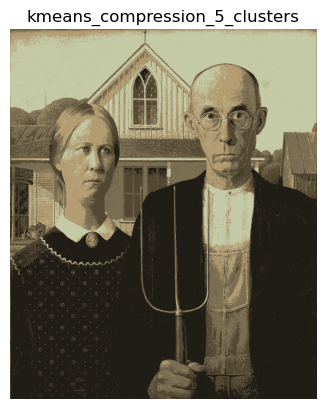

In [8]:
# Use the custom function to compress the original image using 5 clusters
cimg = compress_image(img, 5)
plt.title("kmeans_compression_5_clusters")
plt.imshow(cimg);
plt.axis('off')
plt.show()

io.imsave("compressed_5_clusters.jpg", cimg)

##### d) Apply k-means clustering for $k\in\{1, 2, 3, 5, 10, 15, 20\}$. Plot and save the compressed images of each iteration. If your computer is strong enough, try up to k=50. Observe the size of the image files. Looking at the images, at what point do you notice deminishing improvements in terms of image quality?

In [12]:
# TODO: loop your custom "compress_image" function for different k and save each
#  compressed image locally to compare file sizes.
for k in range(1, 11, 2):
    compressed_img = compress_image(img, k)
    filename = f"compressed_{k}_clusters.jpg"
    io.imsave(filename, compressed_img)
    print(f"Compressed image with {k} clusters saved as {filename}")

/var/folders/_l/xbjs439j31l5zpbzq9pbf3p80000gn/T/ipykernel_2445/3582903627.py:6: UserWarning: compressed_1_clusters.jpg is a low contrast image
  io.imsave(filename, compressed_img)


Compressed image with 1 clusters saved as compressed_1_clusters.jpg
Compressed image with 3 clusters saved as compressed_3_clusters.jpg
Compressed image with 5 clusters saved as compressed_5_clusters.jpg
Compressed image with 7 clusters saved as compressed_7_clusters.jpg
Compressed image with 9 clusters saved as compressed_9_clusters.jpg


##### e) Determine a reasonable number of clusters using the "elbow criterion". For this purpose, plot the total within-cluster sum of squares (attribute "inertia_" of the "KMeans" object) against the number of clusters, e.g. for $k\in[1, 10]$. Does the "elbow point" correspond to your visual impression in part d)?

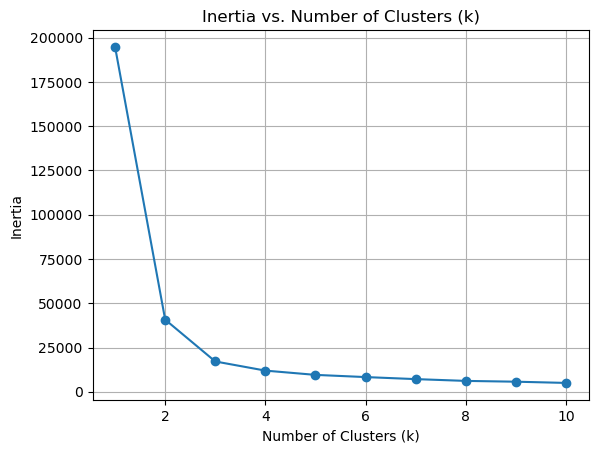

In [13]:
# TODO: for k in [1, ..., 10], plot the corresponding inertia_ of the KMeans
#  (use the keep_kmeans_objects=True functionality of the compress_image function)
inertias = []
for k in range(1, 11):
    _, km = compress_image(img, k, keep_kmeans_objects=True)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title("Inertia vs. Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

- Inertia is the sum of squared distances of each data point to its closest cluster center. It’s essentially the total squared error of the clustering. Like distortion, a lower inertia value suggests better clustering.
- In the Elbow Method, we calculate the distortion or inertia for different values of k (number of clusters). We then plot these values to identify the “elbow point”, where the rate of decrease in distortion or inertia starts to slow down. This elbow point often indicates the optimal number of clusters.
- The goal is to indentify the point where the rate of decrease in WCSS sharply changes, indicating that adding more clusters (beyond this point) yields dimishing returns. This "elbow" point suggests the optimal number of clusters. 
- In our case this could be at $k=4$